In [7]:
import os
import h5py
import random
import pickle
import numpy as np
import pandas as pd
from PIL import Image as PilImage
from pandas import Series
from pandas import DataFrame
import matplotlib.pyplot as plt
from IPython.display import display, Image
%matplotlib inline
plt.style.use('ggplot')

In [2]:
sources = pickle.load(open('sources.p', 'rb'))

##  Dataset sizes

In [3]:
def dir_size_and_count(folder):
    size = sum(os.path.getsize('%s/%s'% (folder,f)) for f in os.listdir(folder) if os.path.isfile('%s/%s'% (folder,f)))
    arr = [f for f in os.listdir(folder) if f.endswith('.png')]
    count = len(arr)
    return size, count

In [4]:
d = {'sizes': [], 'images':[]}

for key, _ in sources.iteritems():
    size, count = dir_size_and_count(sources[key]['folder'])
    d['sizes'].append('{0:,}'.format(size))
    d['images'].append(count)
    
df = DataFrame(data=d, index=sources.keys()) 
print df

       images          sizes
test    13068    356,832,724
train   33402    626,161,412
extra  202353  3,504,414,984


## Image visualization

In [6]:
def pick_random_files(folder, n):
    files = []
    listdir = os.listdir(folder)
    for i in range(n):
        files.append(random.choice(listdir))
    return files

test


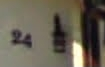

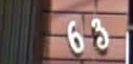

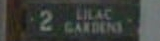

train


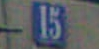

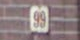

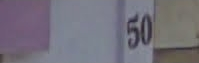

extra


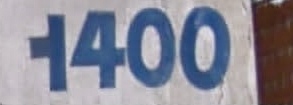

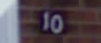

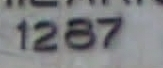

In [7]:
num_samples = 3

for key, source in sources.iteritems():
    image_names = pick_random_files(source['folder'], num_samples)
    print(key)
    for filename in image_names:
        path = '%s/%s' % (source['folder'], filename)
        image = Image(path)
        display(image)

## Image sizes

In [8]:
def images_stats(path): 
    filenames = []
    data = {'width':[], 'height': []}
    
    for f in os.listdir(path):
        if not f.endswith('.png'):
            continue
        with PilImage.open('%s/%s' % (path,f)) as im:
            filenames.append(f.split('.')[0])
            data['width'].append(im.size[0])
            data['height'].append(im.size[1])
            
    df = pd.DataFrame(data, index=filenames)
    return df

In [9]:
for dsname, source in sources.iteritems():
    source['image_size_df'] = images_stats(source['folder'])

In [10]:
for dsname, source in sources.iteritems():
    print dsname, '\n', source['image_size_df'].max(), '\n'

test 
height     516
width     1083
dtype: int64 

train 
height    501
width     876
dtype: int64 

extra 
height    415
width     668
dtype: int64 



In [11]:
for dsname, source in sources.iteritems():
    print dsname, '\n', source['image_size_df'].min(), '\n'

test 
height    13
width     31
dtype: int64 

train 
height    12
width     25
dtype: int64 

extra 
height    13
width     22
dtype: int64 



In [12]:
for dsname, source in sources.iteritems():
    print dsname, '\n', source['image_size_df'].std(), '\n'

test 
height     52.752352
width     122.586447
dtype: float64 

train 
height    36.179696
width     80.546218
dtype: float64 

extra 
height    29.747266
width     49.785555
dtype: float64 



In [13]:
for dsname, source in sources.iteritems():
    print dsname, '\n',  source['image_size_df'].mean(), '\n'

test 
height     71.566498
width     172.583486
dtype: float64 

train 
height     57.213011
width     128.284983
dtype: float64 

extra 
height     60.800151
width     100.389250
dtype: float64 



## Image details

In [4]:
def get_attr(c, i, attr):
    d = c[c['digitStruct']['bbox'][i][0]][attr].value.squeeze()
    if d.dtype == 'float64':
        return d.reshape(-1)
    return np.array([c[x][()] for x in d]).squeeze()

def get_label(c, i):
    d = c[c['digitStruct']['name'][i][0]].value.tostring()
    return d.replace('\x00', '')

def load_data(path):
    c = h5py.File(path)
    
    ds_name_shape = c['digitStruct']['name'].shape[0]
    len_ds_bbox = len(c['digitStruct']['bbox'])
    if 'extra' in path:
        ds_name_shape = len_ds_bbox = 125000

    images = a = np.ndarray(shape=(ds_name_shape,  ), dtype='|S15')
    labels = np.zeros((len_ds_bbox, 6), dtype=float)
    labels.fill(0)
    tops = np.zeros((len_ds_bbox, 6), dtype=float)
    heights = np.zeros((len_ds_bbox, 6), dtype=float)
    widths = np.zeros((len_ds_bbox, 6), dtype=float)
    lefts = np.zeros((len_ds_bbox, 6), dtype=float)
    for i in xrange(ds_name_shape):
        images[i] = get_label(c, i)
        l = get_attr(c, i, 'label')
        t = get_attr(c, i, 'top')
        h = get_attr(c, i, 'height')
        w = get_attr(c, i, 'width')
        le = get_attr(c, i, 'left')
        
        labels[i, :l.shape[0]] = l
        tops[i, :t.shape[0]] = t
        heights[i, :h.shape[0]] = h
        widths[i, :w.shape[0]] = w
        lefts[i, :le.shape[0]] = le
    
        if (i % 5000 == 0):
            print(i, "elapsed")
    
    return {'labels': labels, 'images':images, 'tops':tops, 'heights':heights, 'widths':widths, 'lefts':lefts}

In [5]:
extra__dict = load_data('extra/digitStruct.mat')
train__dict = load_data('train/digitStruct.mat')
test__dict = load_data('test/digitStruct.mat')

(0, 'elapsed')
(5000, 'elapsed')
(10000, 'elapsed')
(15000, 'elapsed')
(20000, 'elapsed')
(25000, 'elapsed')
(30000, 'elapsed')
(35000, 'elapsed')
(40000, 'elapsed')
(45000, 'elapsed')
(50000, 'elapsed')
(55000, 'elapsed')
(60000, 'elapsed')
(65000, 'elapsed')
(70000, 'elapsed')
(75000, 'elapsed')
(80000, 'elapsed')
(85000, 'elapsed')
(90000, 'elapsed')
(95000, 'elapsed')
(100000, 'elapsed')
(105000, 'elapsed')
(110000, 'elapsed')
(115000, 'elapsed')
(120000, 'elapsed')
(0, 'elapsed')
(5000, 'elapsed')
(10000, 'elapsed')
(15000, 'elapsed')
(20000, 'elapsed')
(25000, 'elapsed')
(30000, 'elapsed')
(0, 'elapsed')
(5000, 'elapsed')
(10000, 'elapsed')


### Serialization

In [6]:
valid_size = 2000
def maybe_pickle(struct, force=False):
    if os.path.exists(struct + '.pickle') and not force:
        print('%s already present - Skipping pickling.' % struct)
    else:
        print('Pickling %s.pickle' % struct)
        permutation = np.random.permutation(125000)[:valid_size]
        dataset = {
            'train': train__dict,
            'test':  test__dict,
            'extra': extra__dict,
            'valid': {
                'labels': extra__dict['labels'][permutation],
                'images': extra__dict['images'][permutation],  
                'tops': extra__dict['tops'][permutation],
                'heights': extra__dict['heights'][permutation],
                'widths': extra__dict['widths'][permutation],
                'lefts': extra__dict['lefts'][permutation],
            }
        }
        try:
            with open( struct + '.pickle', 'wb') as f:
                pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
        except Exception as e:
            print('Unable to save data to',  struct + '.pickle', ':', e)
        return  struct + '.pickle'

In [7]:
maybe_pickle('dataset')

Pickling dataset.pickle


'dataset.pickle'

In [5]:
with open('dataset.pickle', 'rb') as f:
    dataset = pickle.load(f)

### Digit count

In [8]:
def image_digitcount_df(ds):
    d = {'d_count':np.sum(ds['lefts'] > 0, axis=1)}
    df = DataFrame(data=d, index=ds['images'])
    return df

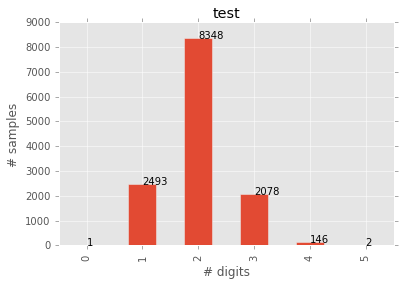

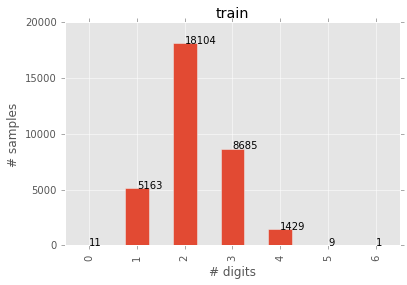

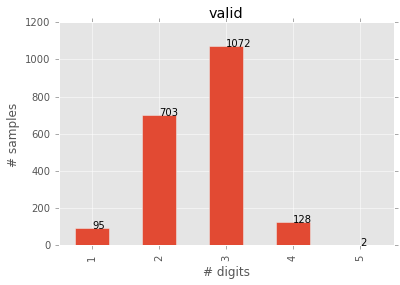

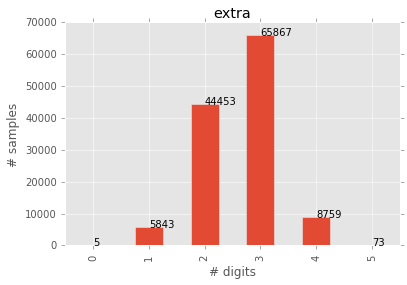

In [9]:
for dsname, ds in dataset.iteritems():
    df = image_digitcount_df(ds)
    digit_count = df['d_count'].value_counts().sort_index()
    
    plt.figure()
    plt.title(dsname)
    plt.xlabel('# digits')
    plt.ylabel('# samples')
    
    for i, label in enumerate(list(digit_count.index)):
        score = digit_count.ix[label]
        plt.annotate(str(score), (i, score))

    digit_count.plot(kind='bar')